## Diagrams

In [78]:
# !pip install diagrams

## Imports

In [79]:
from diagrams import Diagram, Cluster, Edge
from diagrams.onprem.client import User
from diagrams.custom import Custom
from diagrams.programming.language import Python
from diagrams.aws.database import DDB
from diagrams.generic.storage import Storage
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.queue import RabbitMQ
from diagrams.aws.analytics import Redshift

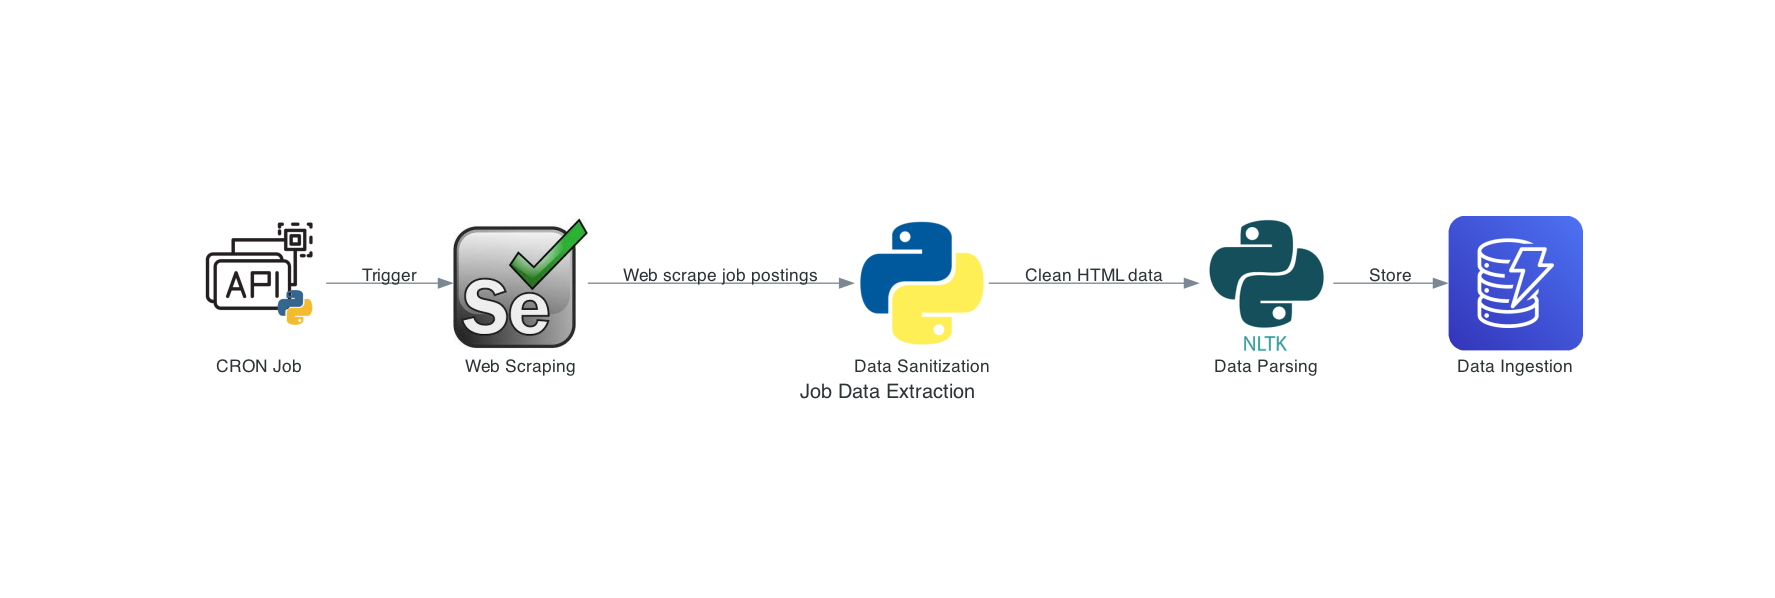

In [80]:
with Diagram("Job Data Extraction", show=False, direction="LR") as diag:
    
    # icons
    scheduler = Custom("CRON Job", "./images/api.png")
    selenium = Custom("Web Scraping", "./images/selenium.png")
    script = Python("Data Sanitization")
    parse = Custom("Data Parsing", "./images/nltk.png")
    store = DDB("Data Ingestion")


    # connections
    scheduler >> Edge(label="Trigger") >> selenium
    selenium >> Edge(label="Web scrape job postings") >> script
    script >> Edge(label="Clean HTML data") >> parse
    parse >> Edge(label="Store") >> store
diag

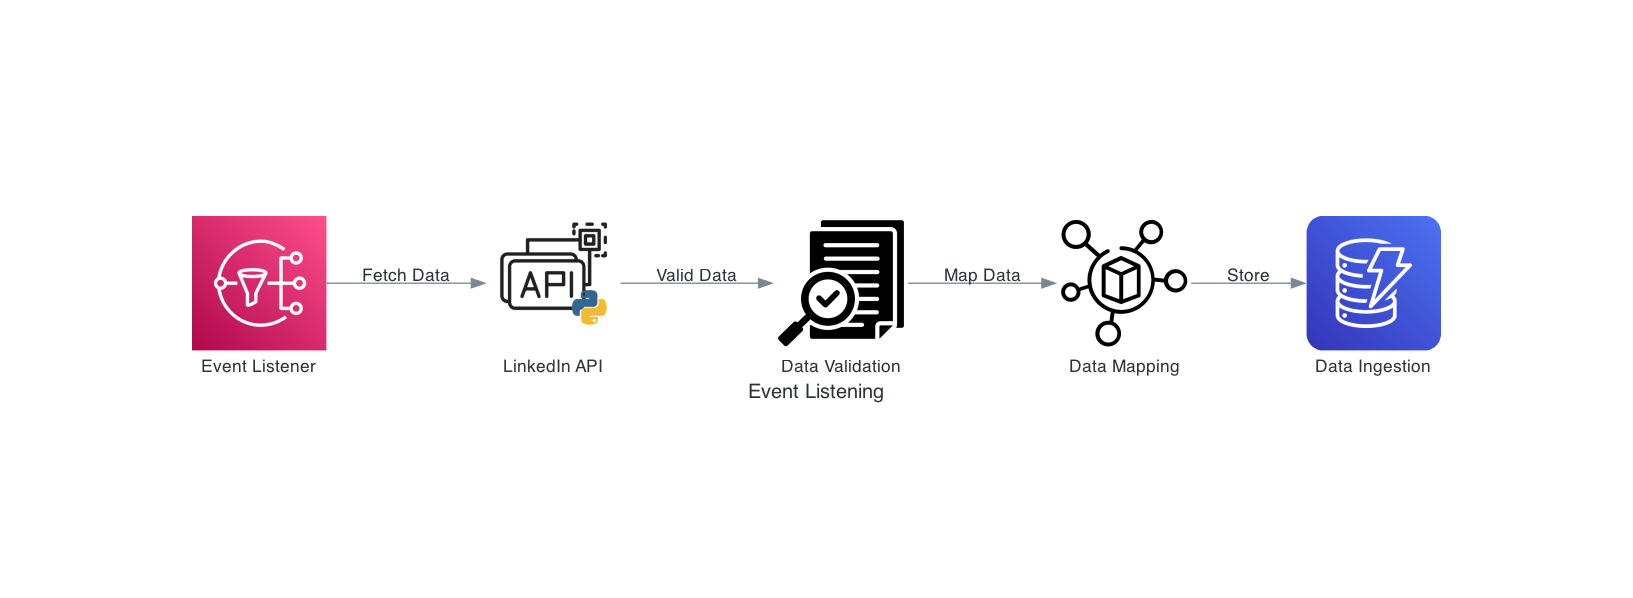

In [81]:
with Diagram("Event Listening", show=False, direction="LR") as diag:
# icons
    webhook = Custom("Event Listener", "./images/Simple Notification Service.png")
    fastapi = Custom("LinkedIn API", "./images/api.png")
    validation = Custom("Data Validation", "./images/audit.png")
    mapping = Custom("Data Mapping", "./images/network-connection.png")
    store = DDB("Data Ingestion")


    # connections
    webhook >> Edge(label="Fetch Data") >> fastapi
    fastapi >> Edge(label="Valid Data") >> validation
    validation >> Edge(label="Map Data") >> mapping
    mapping >> Edge(label="Store") >> store
diag

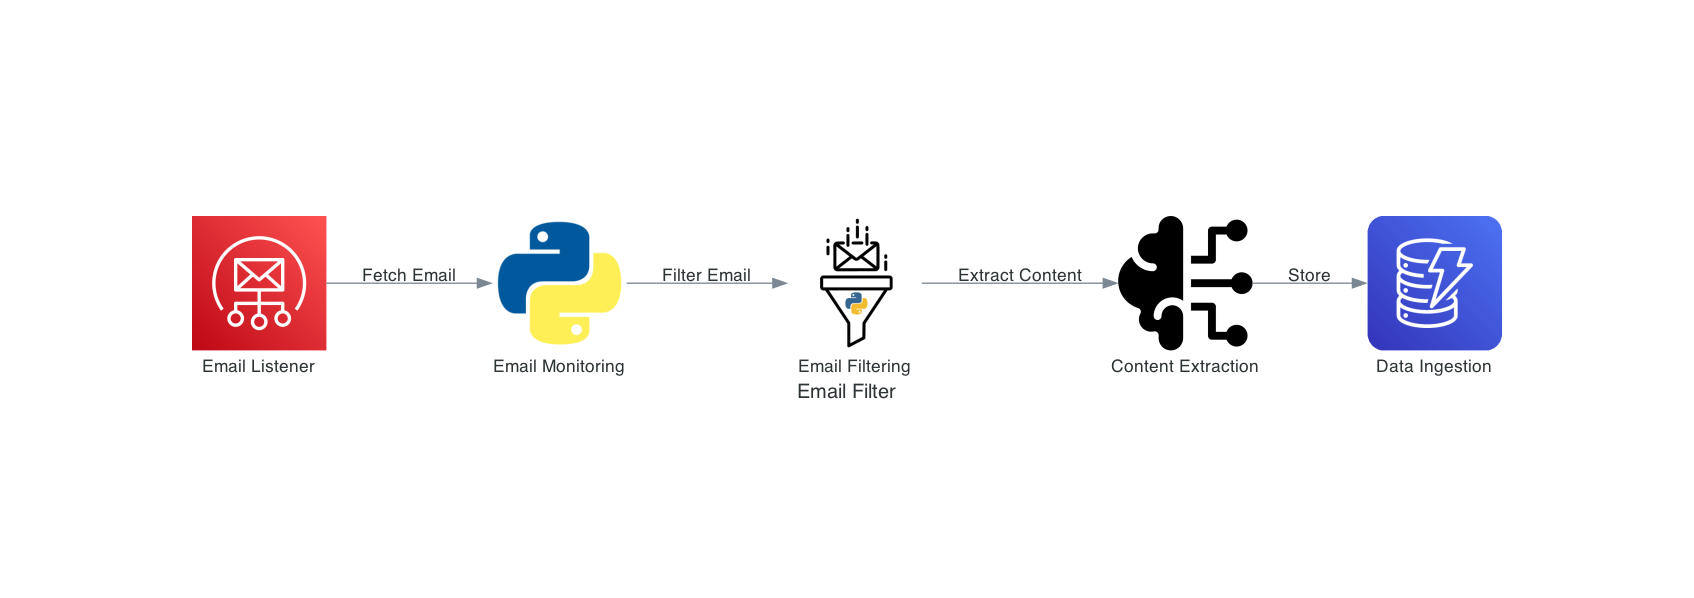

In [82]:
with Diagram("Email Filter", show=False, direction="LR") as diag:
# icons
    listener = Custom("Email Listener", "./images/Simple Email Service.png")
    script = Python("Email Monitoring")
    filtering = Custom("Email Filtering", "./images/email scraping.png")
    nlp = Custom("Content Extraction", "./images/nlp copy.png")
    store = DDB("Data Ingestion")


    # connections
    listener >> Edge(label="Fetch Email") >> script
    script >> Edge(label="Filter Email") >> filtering
    filtering >> Edge(label="Extract Content") >> nlp
    nlp >> Edge(label="Store") >> store
diag

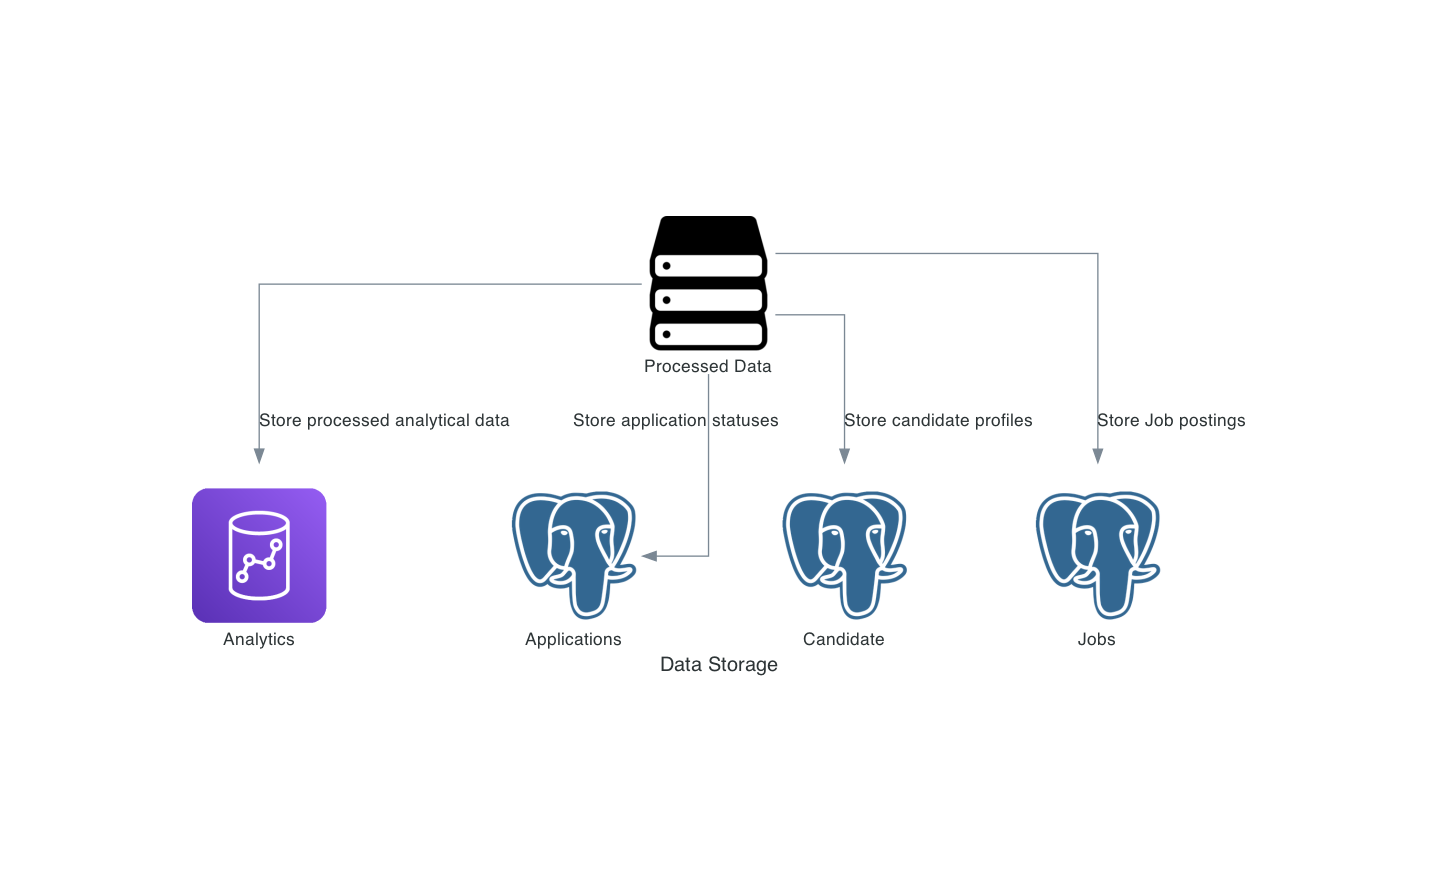

In [83]:

with Diagram("Data Storage", show=False, direction="TB") as diag:
# icons
    data = Storage("Processed Data")
    analytics = Redshift("Analytics")
    apps = PostgreSQL("Applications")
    candidate = PostgreSQL("Candidate")
    jobs = PostgreSQL("Jobs")
    
    # connections
    data >> Edge(label="Store processed analytical data") >> analytics
    data >> Edge(label="Store application statuses") >> apps
    data >> Edge(label="Store candidate profiles") >> candidate
    data >> Edge(label="Store Job postings") >> jobs
diag

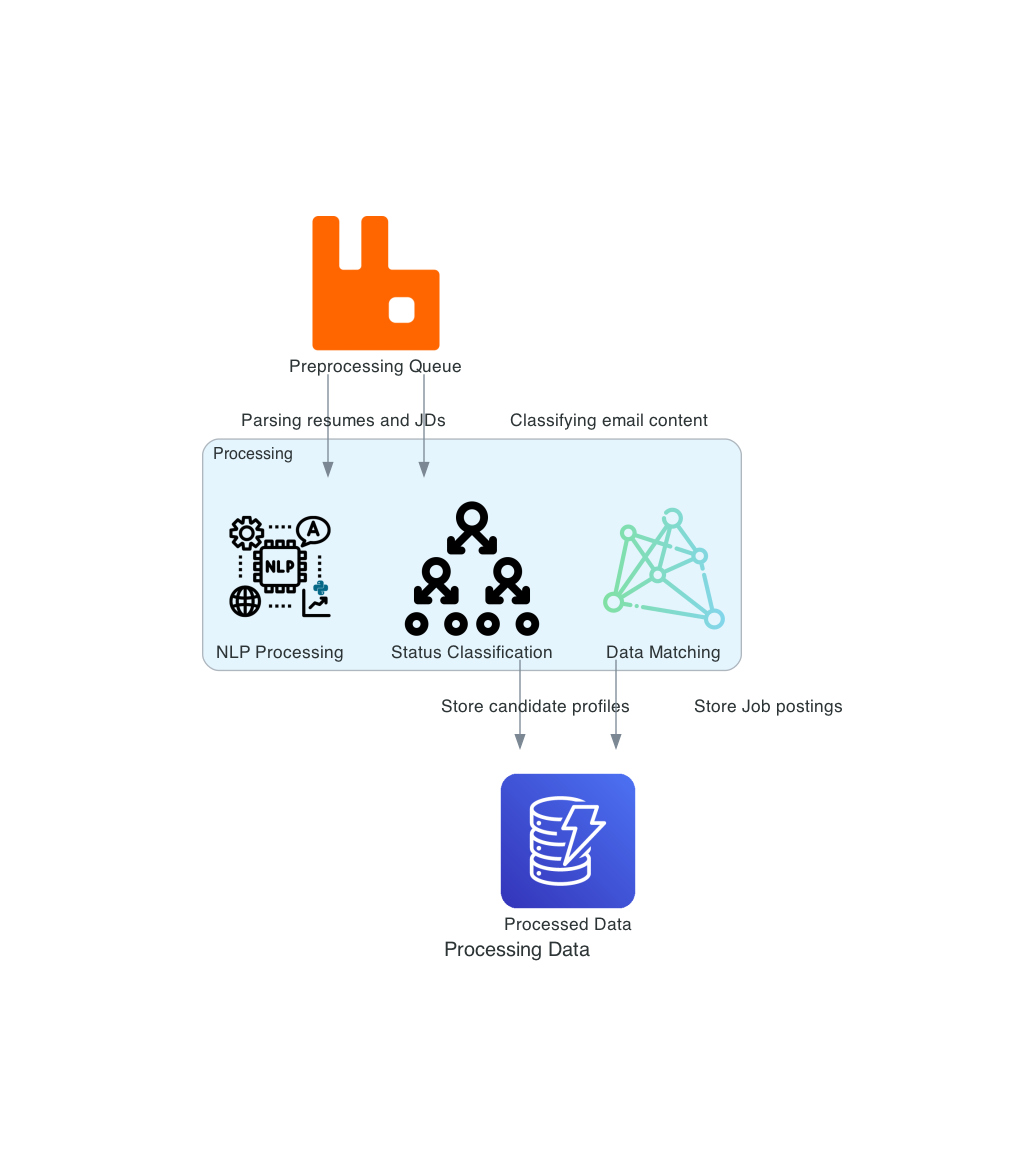

In [84]:

with Diagram("Processing Data", show=False, direction="TB") as diag:
# icons
    data = RabbitMQ("Preprocessing Queue")
    processed = DDB("Processed Data")
    
    with Cluster("Processing"):
        nlp = Custom("NLP Processing", "./images/nlp.png")
        status = Custom("Status Classification", "./images/decision-tree.png")
        matching = Custom("Data Matching", "./images/algorithm.png")
    
    
    # connections
    data >> Edge(label="Parsing resumes and JDs") >> nlp
    data >> Edge(label="Classifying email content") >> status
    status >> Edge(label="Store candidate profiles") >> processed
    matching >> Edge(label="Store Job postings") >> processed
diag